In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Control warnings
import warnings; warnings.simplefilter('ignore')

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import torch
import anndata

import plotly.express as px
import plotly.graph_objects as go

import plotly.express as px
import plotly.graph_objects as go
from anndata import AnnData
from umap import UMAP
from fastTSNE import TSNE
import plotnine as p
import datetime 
from fastTSNE.callbacks import ErrorLogger

import scvi
scvi.__version__


'0.7.0a6'

In [2]:
adata = anndata.read('./taylor2019.h5ad')


In [3]:
adata.obs

,barcode,experiment,tissue_type,cell_type
0,acr2_AAACCCAAGATCGCTT-1,acr-2,Neuron,Unknown_NT
1,acr2_AAACCCAAGTCATAGA-1,acr-2,Neuron,VB
2,acr2_AAACCCACAACACGTT-1,acr-2,Neuron,VB
3,acr2_AAACCCACAAGCTCTA-1,acr-2,Neuron,VB
4,acr2_AAACCCACACCTGATA-1,acr-2,Neuron,DA
...,...,...,...,...
65445,u3_TTTGTCATCAACGGCC-1,unc-3,Neuron,BDU
65446,u3_TTTGTCATCACCCGAG-1,unc-3,Neuron,RIA
65447,u3_TTTGTCATCCTAGAAC-1,unc-3,Neuron,SMB
65448,u3_TTTGTCATCTGGAGCC-1,unc-3,Neuron,ASG


 ======================== Tayrlor 10xv3 single cell11719 droplets, library: acr-2 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10952.80it/s]
 ======================== Tayrlor 10xv3 single cell2648 droplets, library: ceh-34 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10176.11it/s]
 ======================== Tayrlor 10xv2 single cell3849 droplets, library: cho-1_1 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10656.28it/s]
 ======================== Tayrlor 10xv2 single cell3471 droplets, library: cho-1_2 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10490.38it/s]
 ======================== Tayrlor 10xv2 single cell4056 droplets, library: ift-20 ==============================
Sampling from binomial...: 100%|██████████| 20000/20000 [00:01<00:00, 10238.59it/s]
 ============

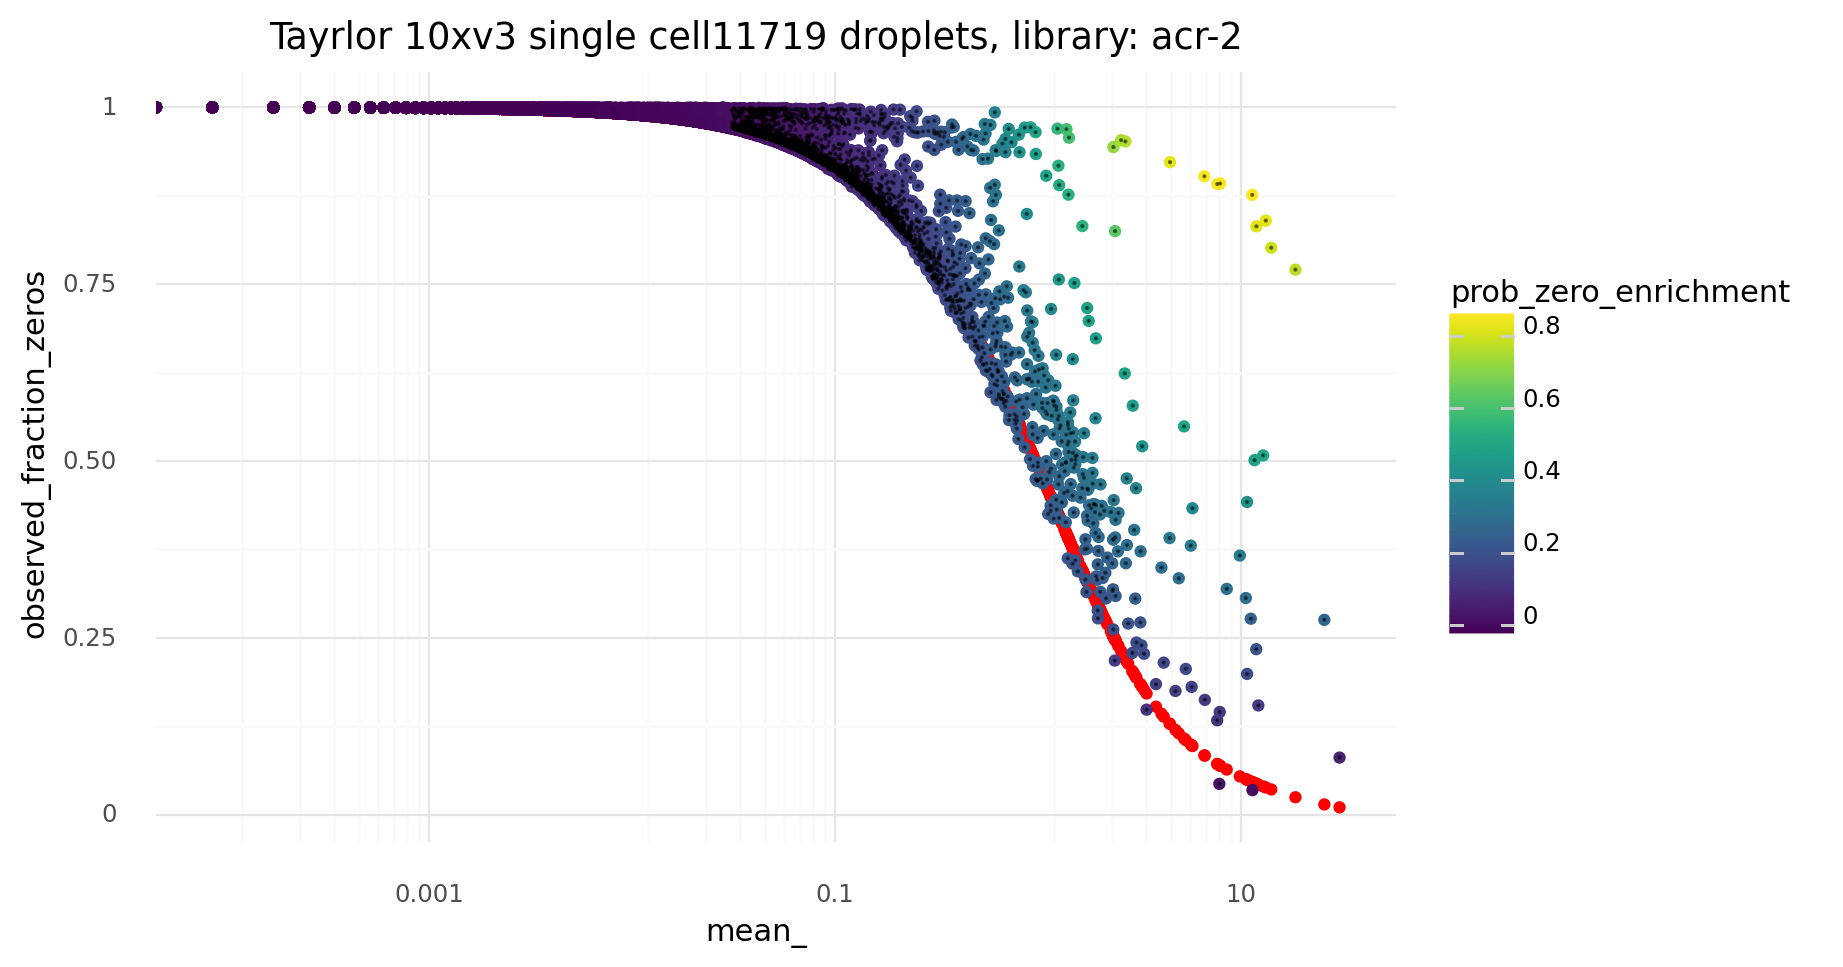

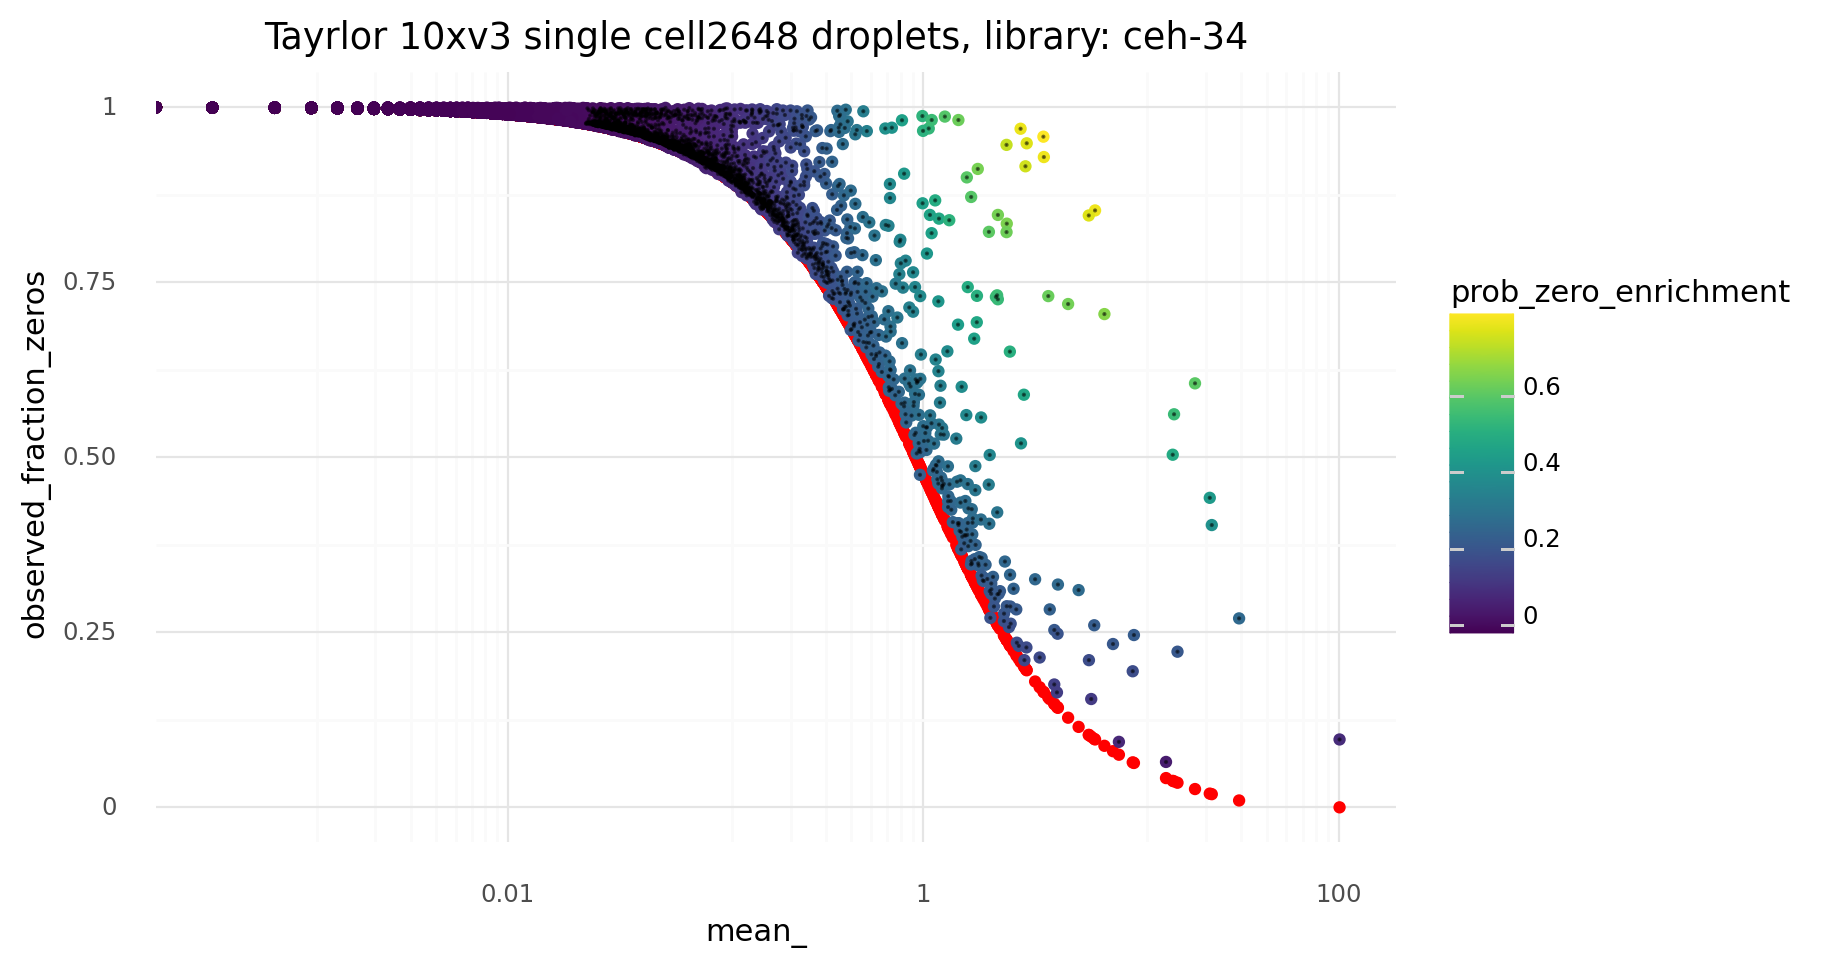

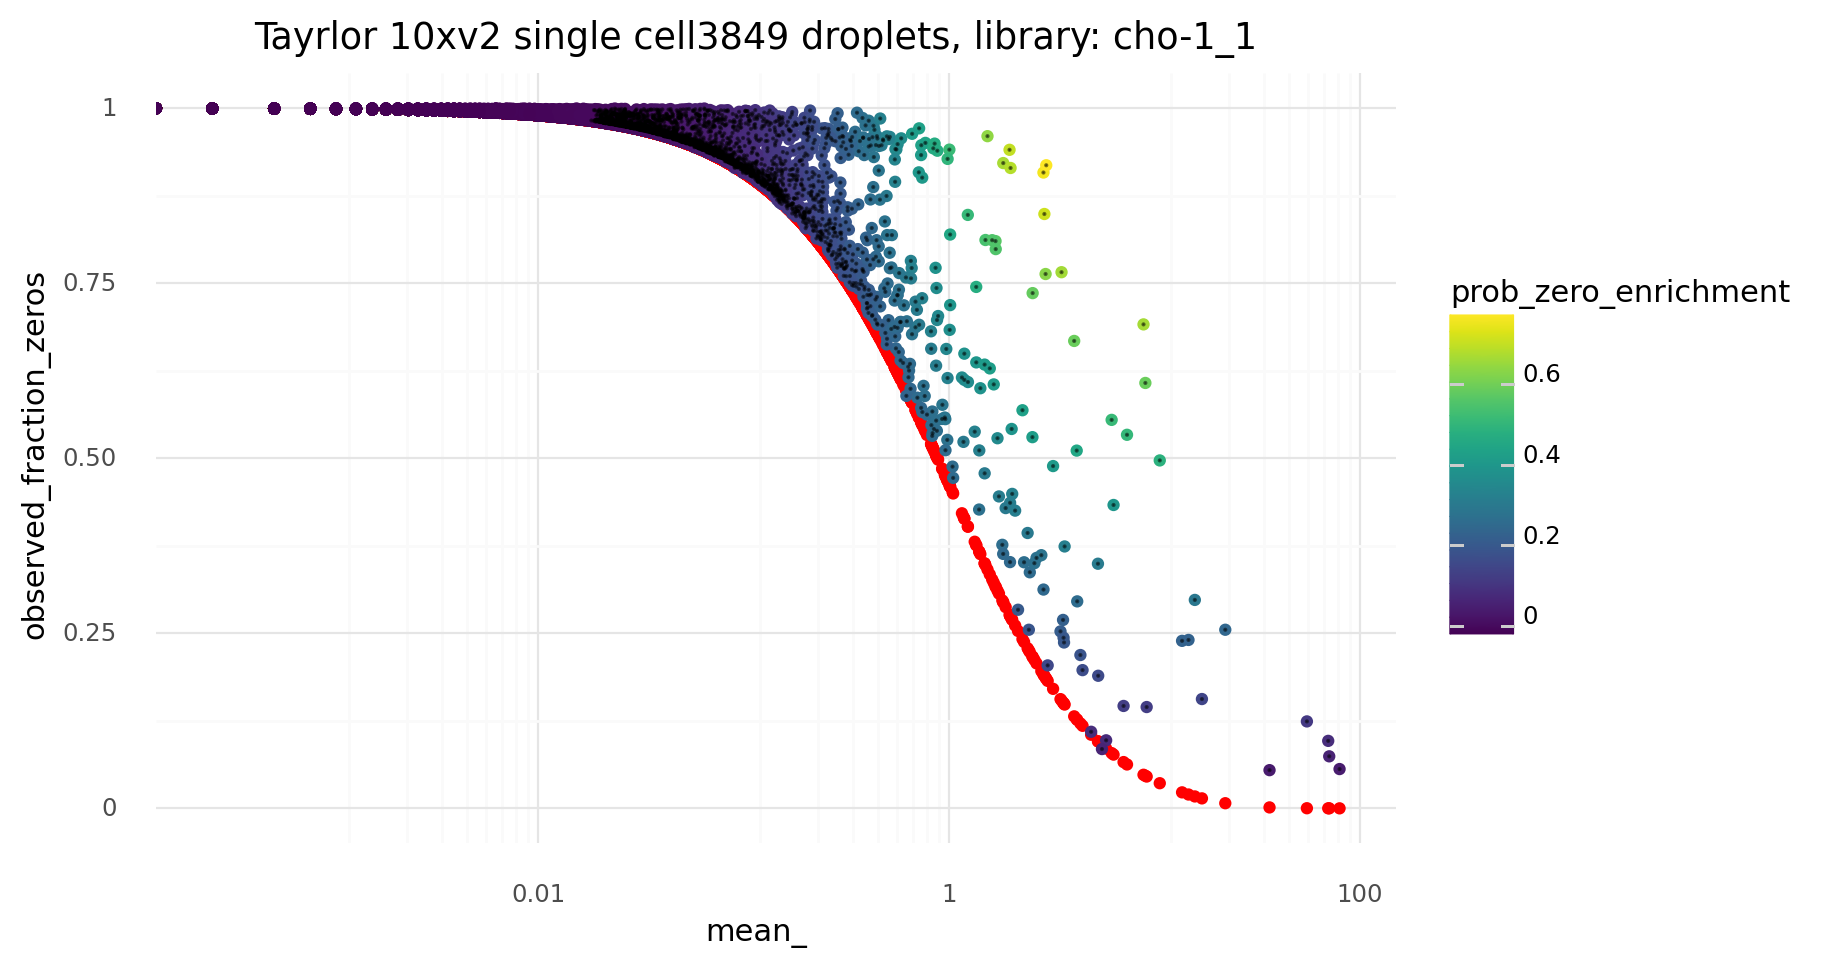

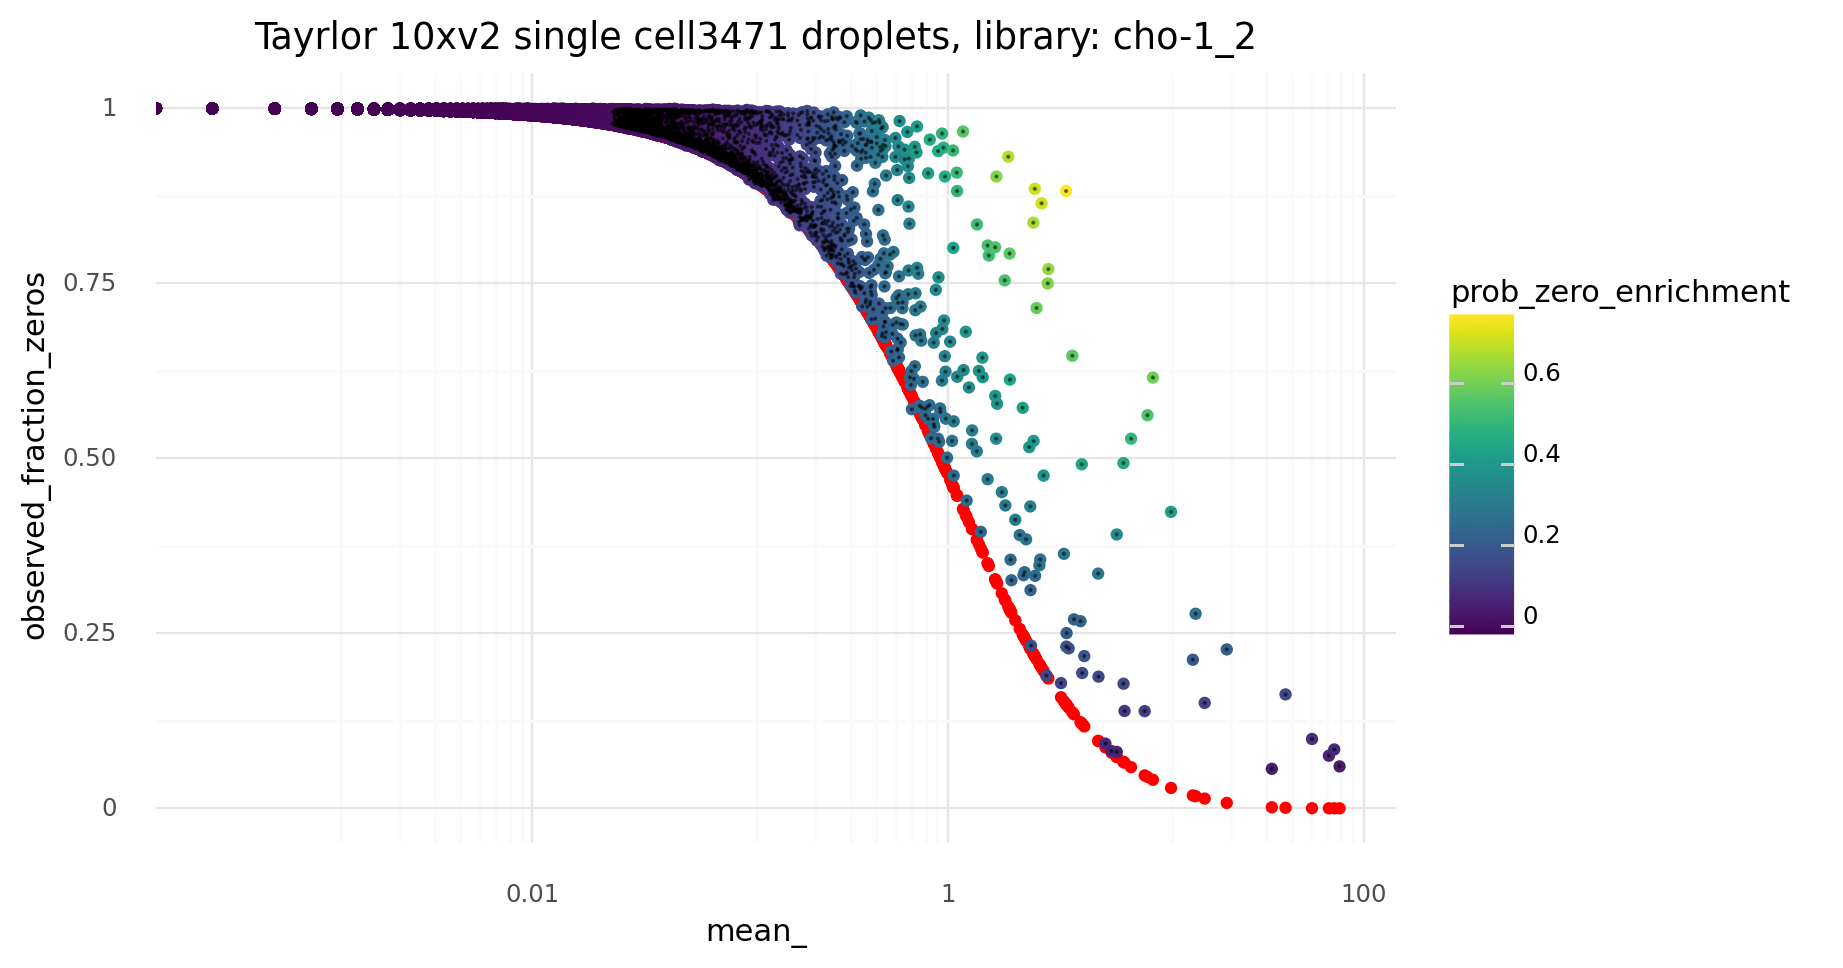

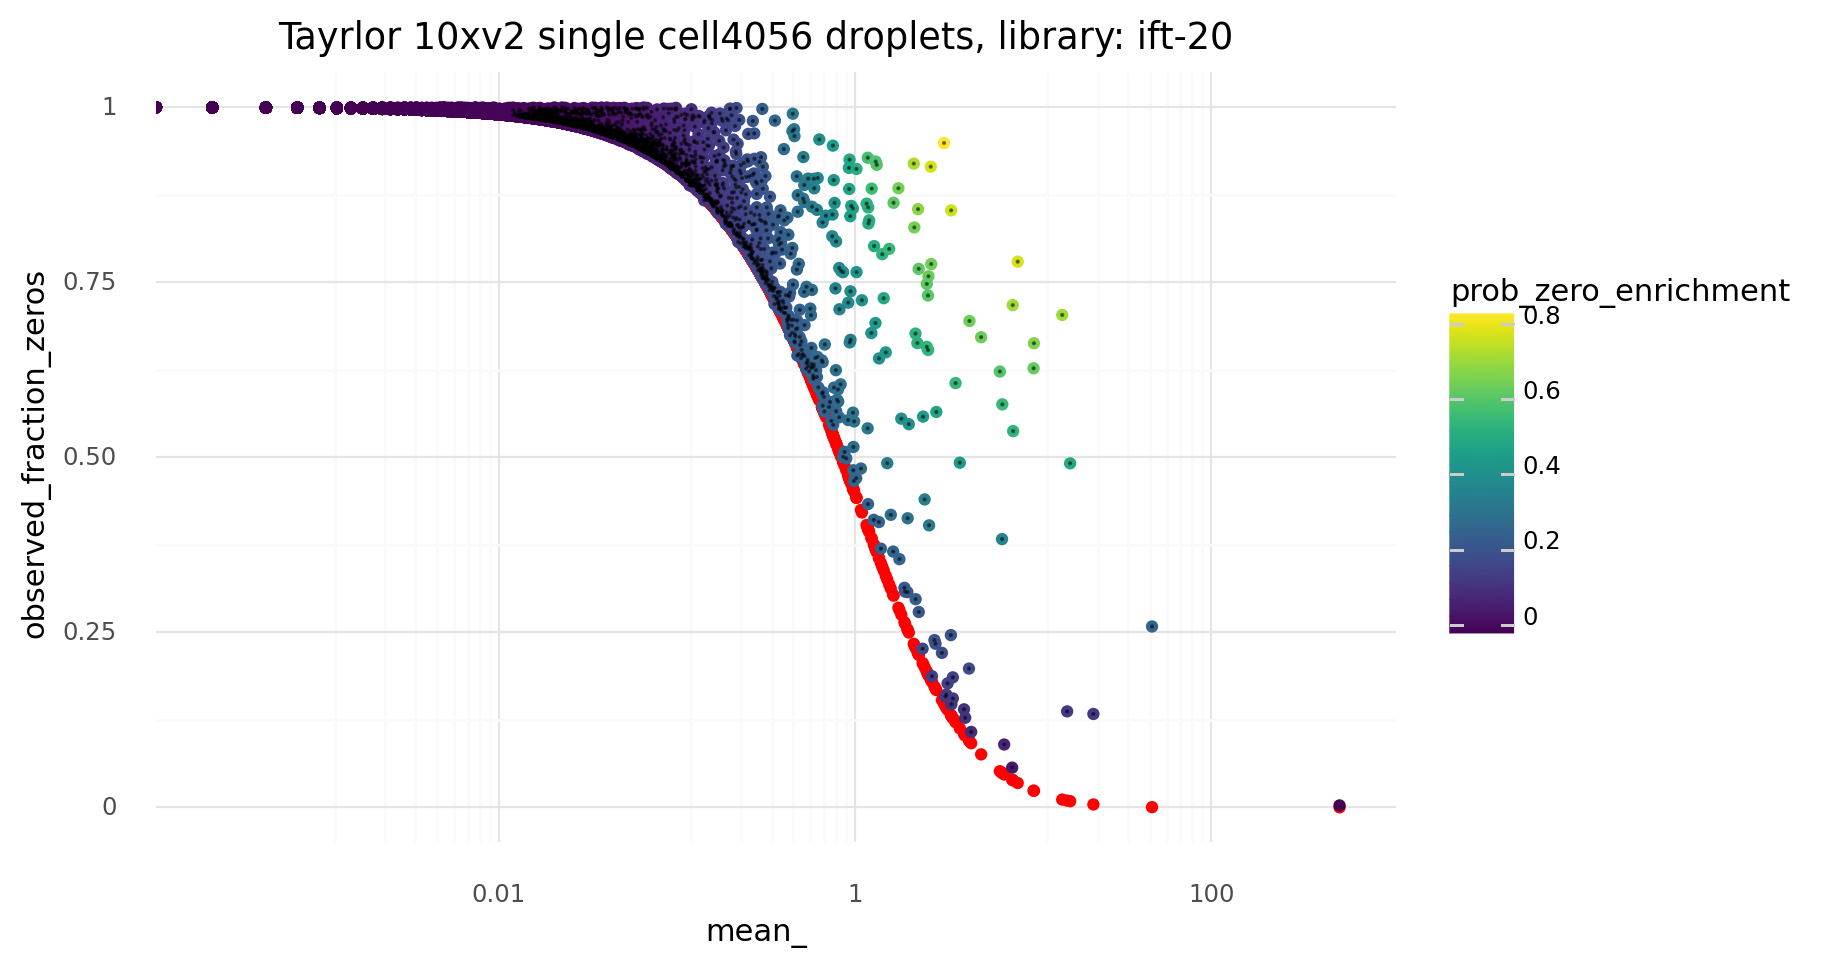

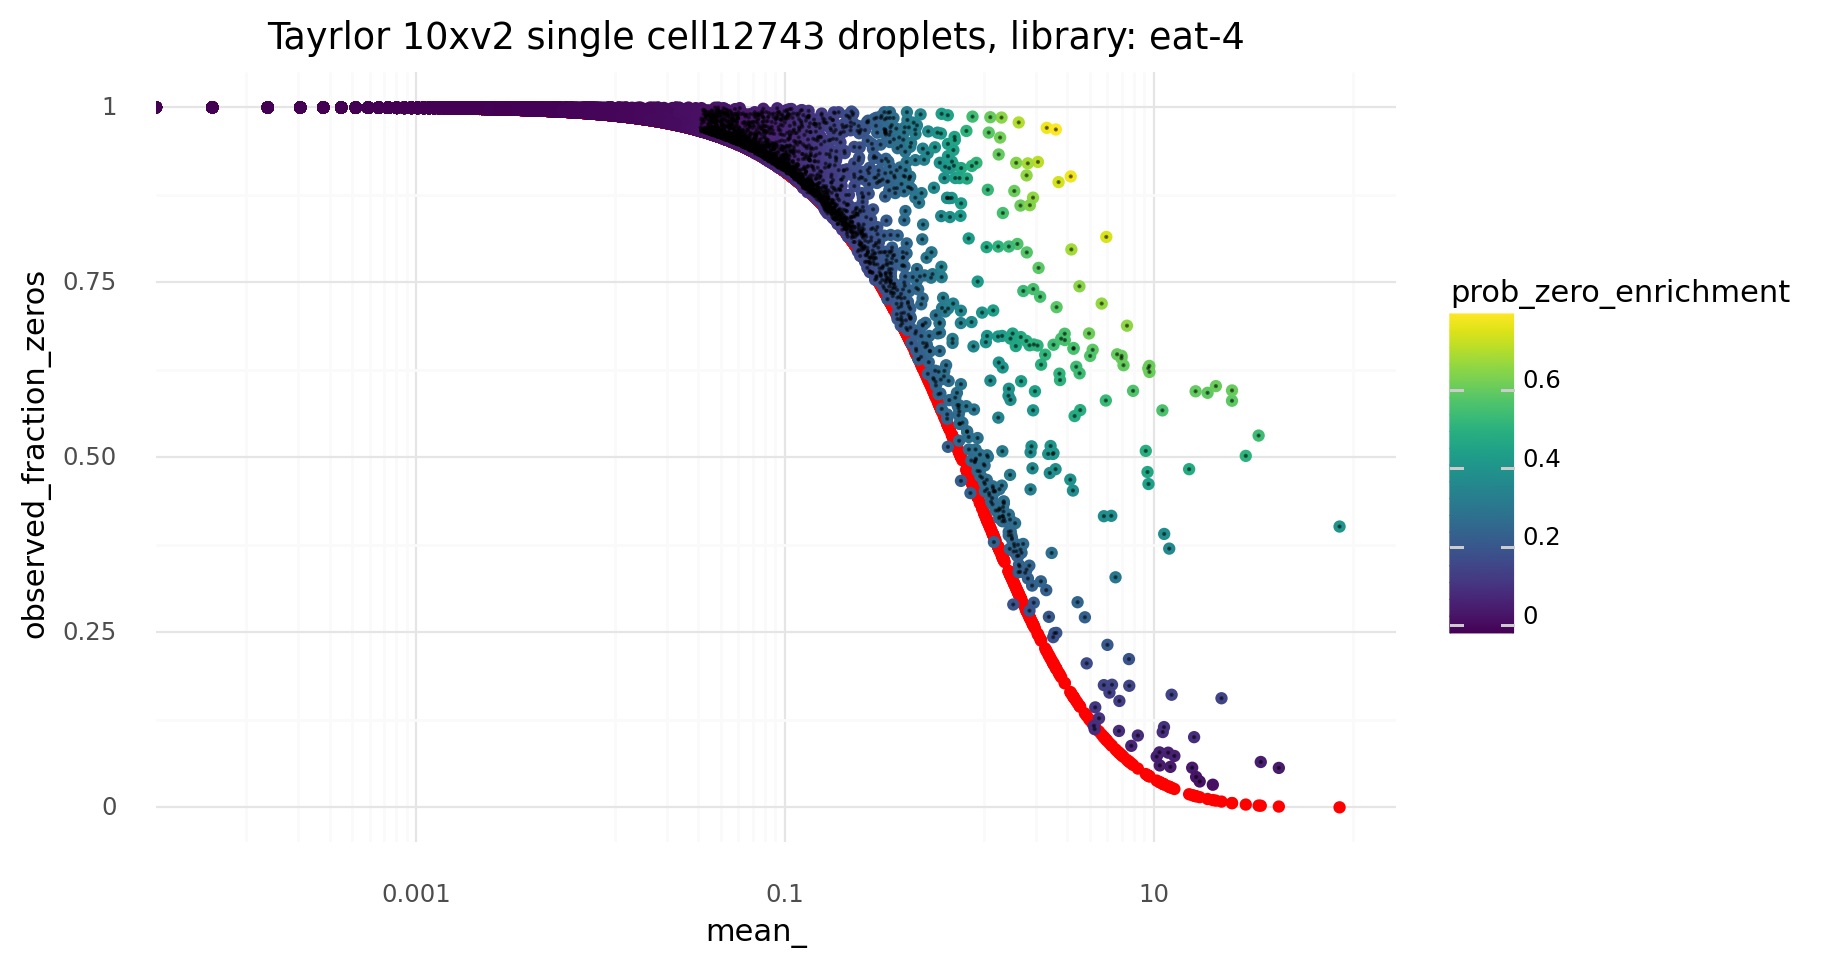

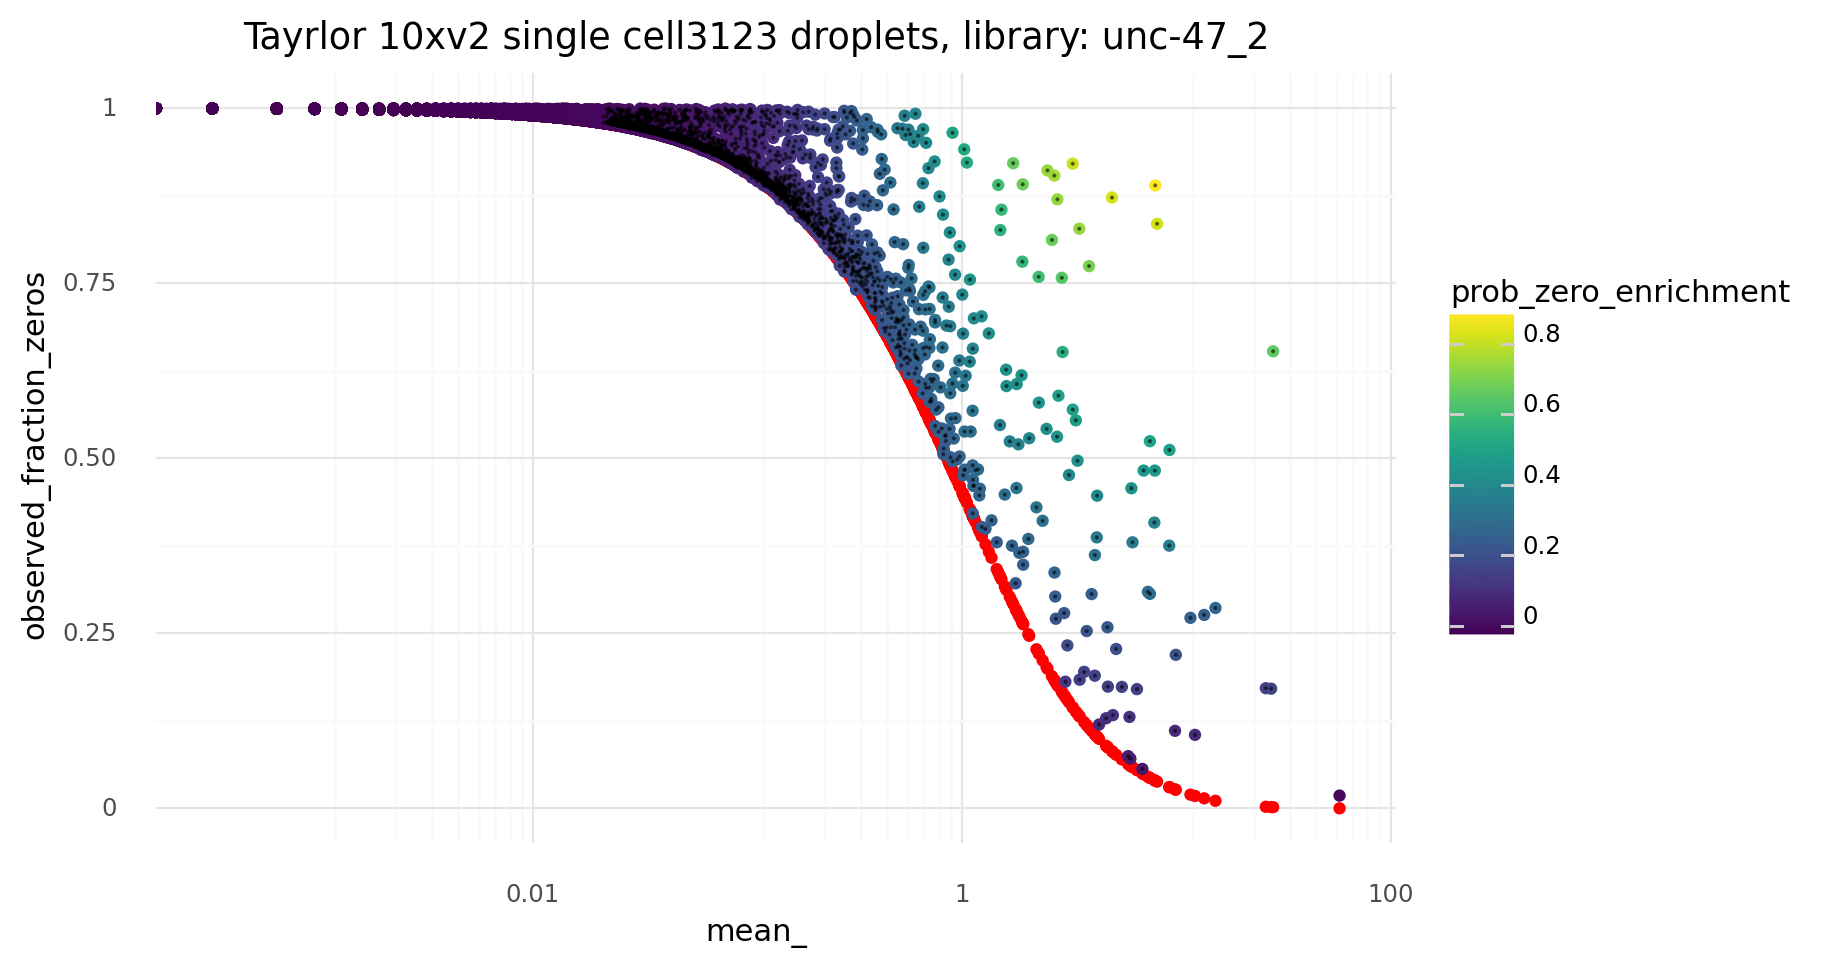

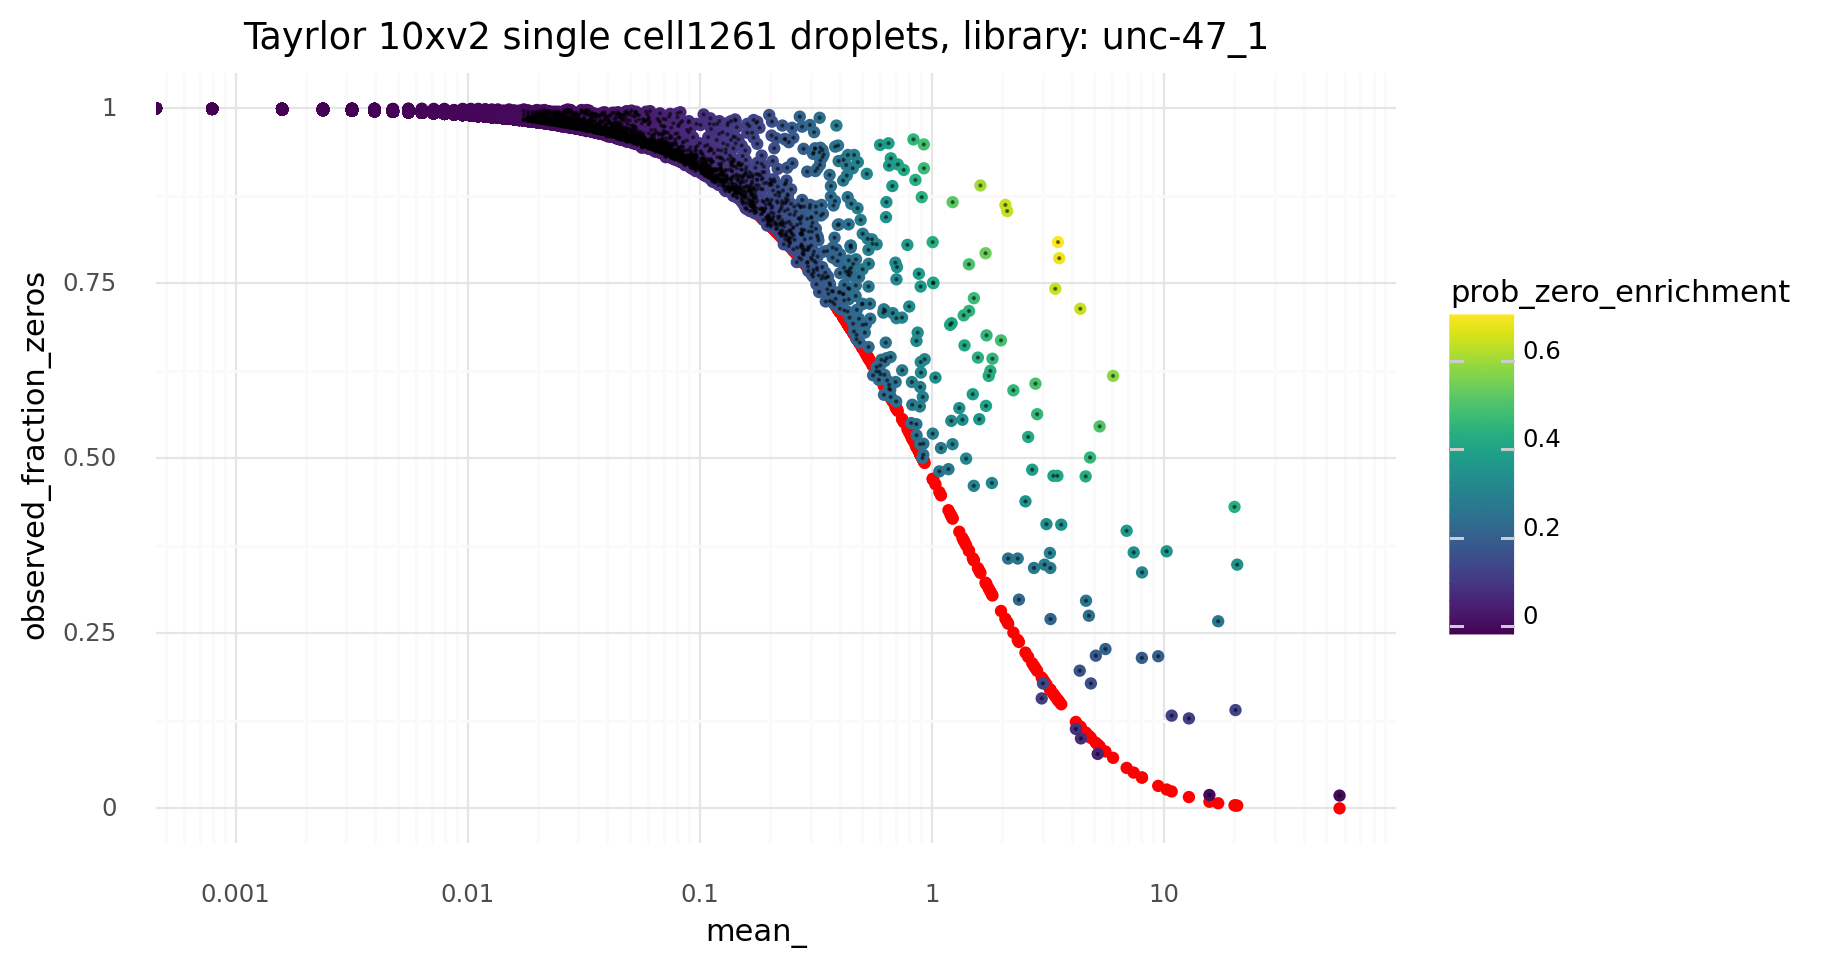

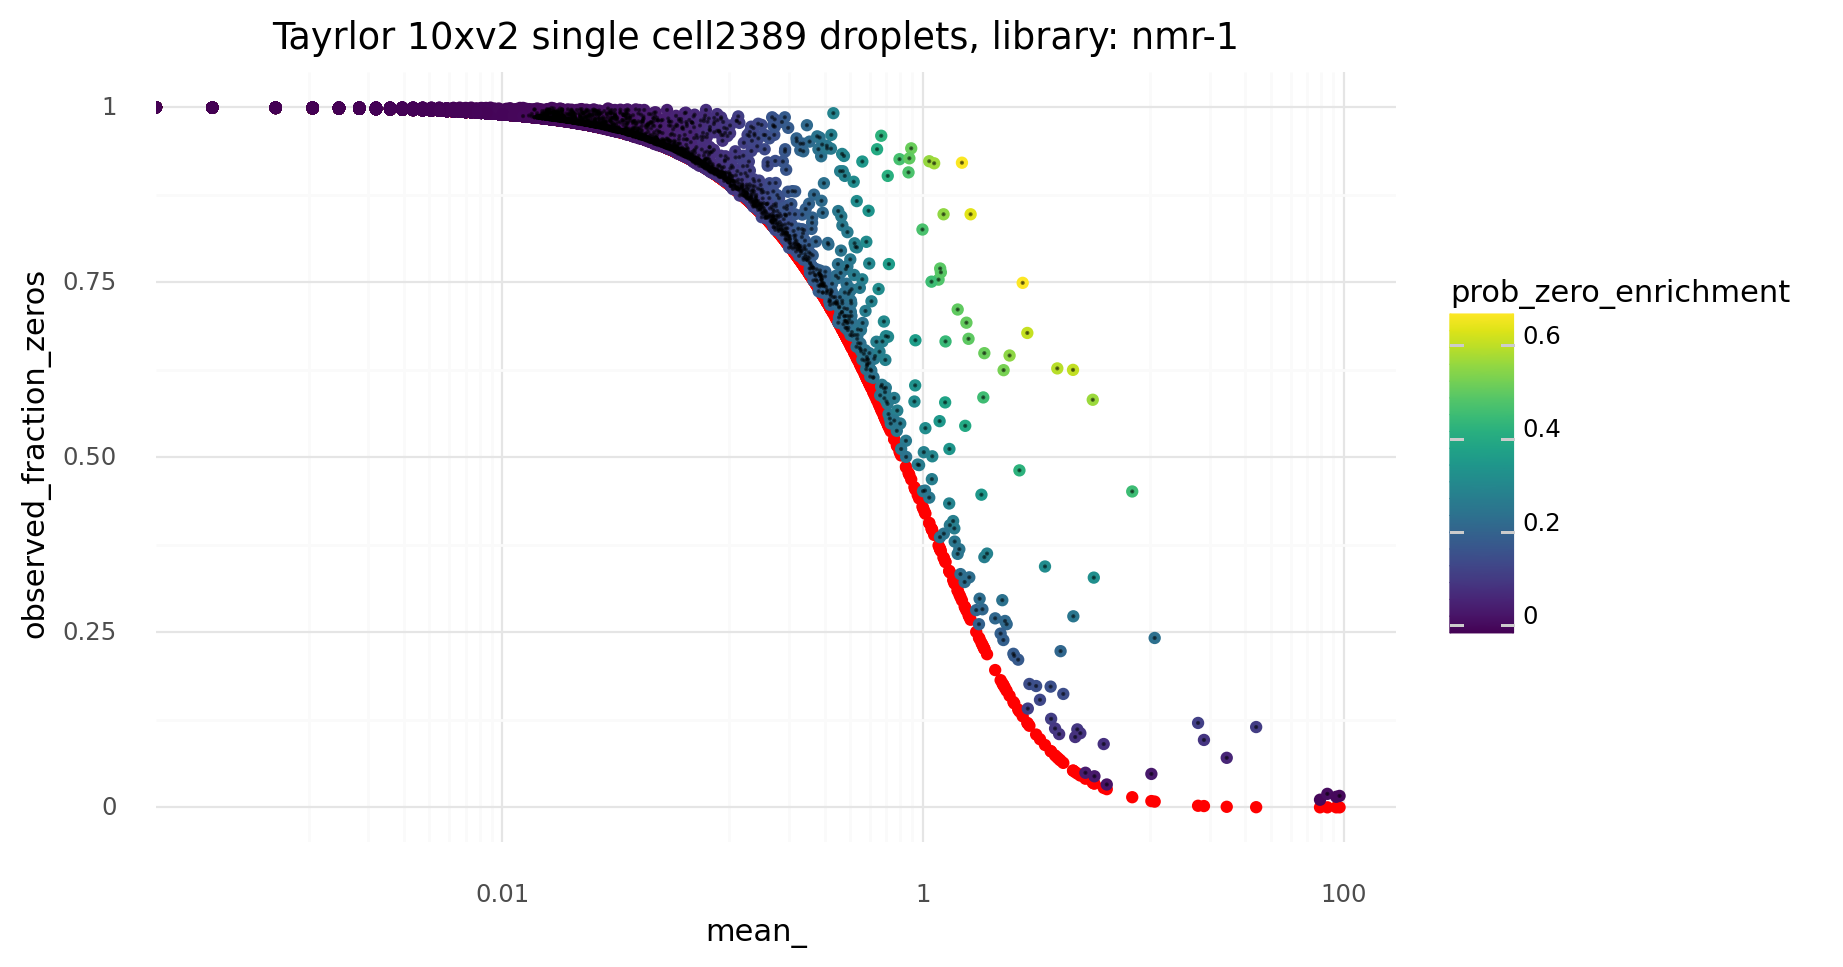

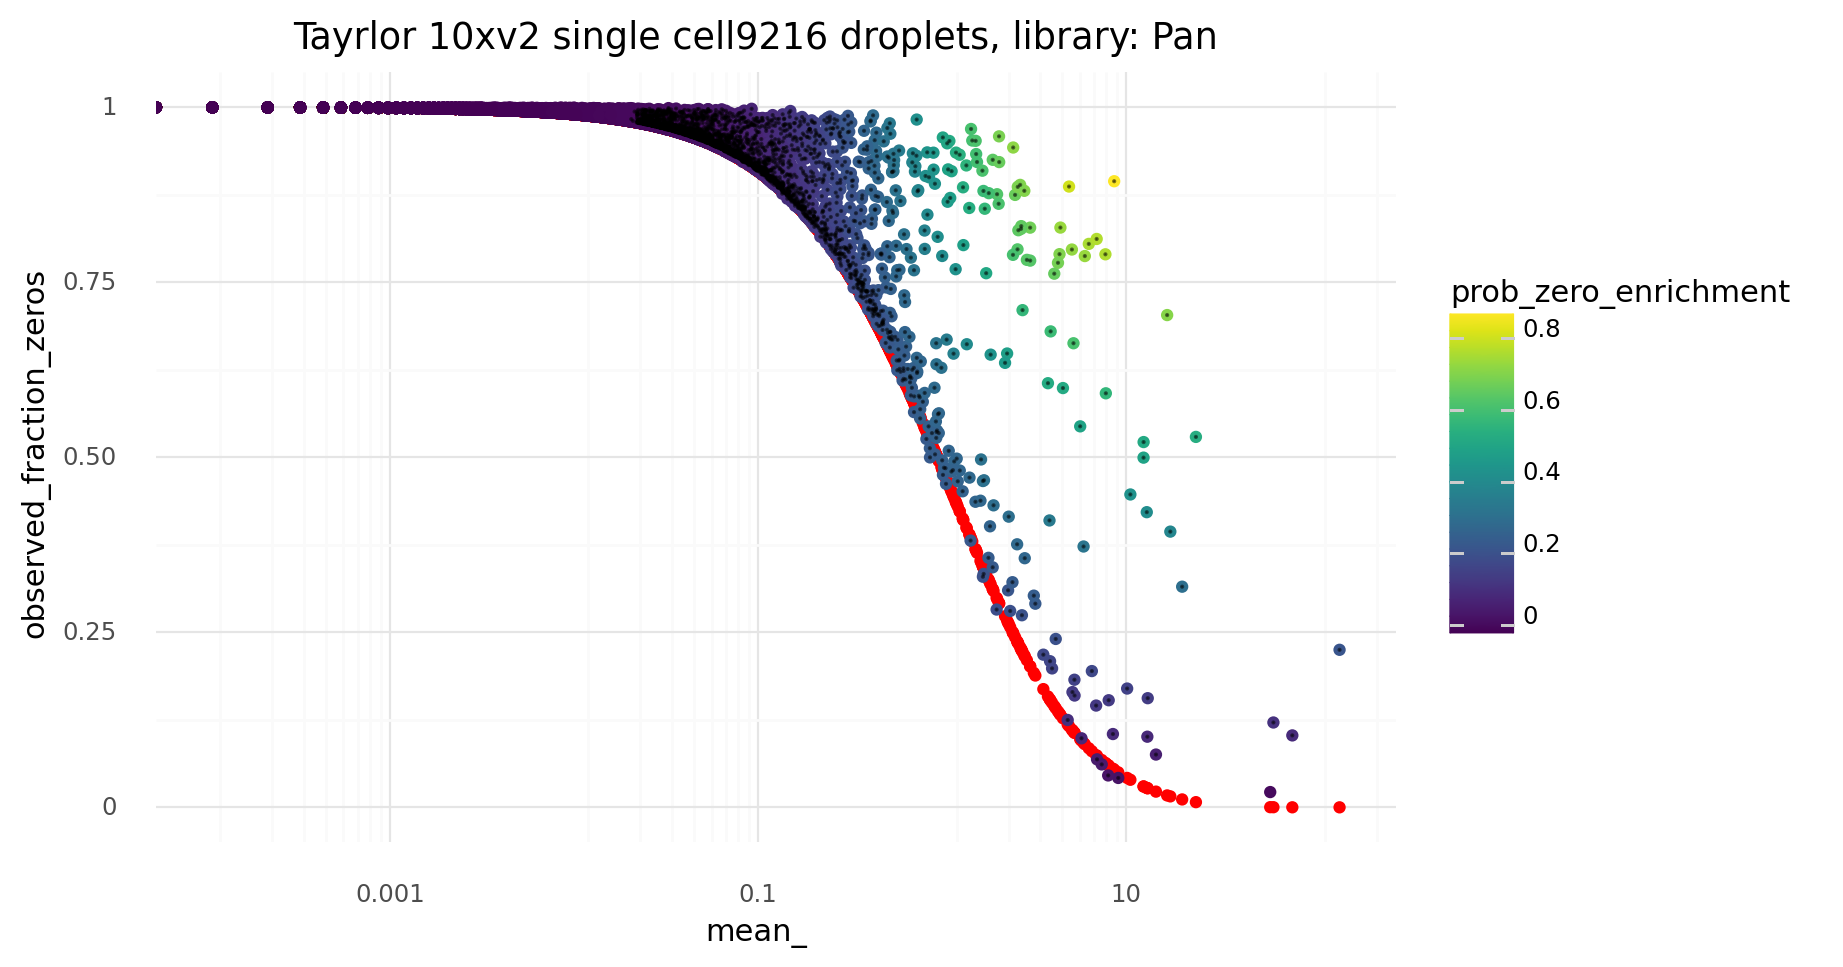

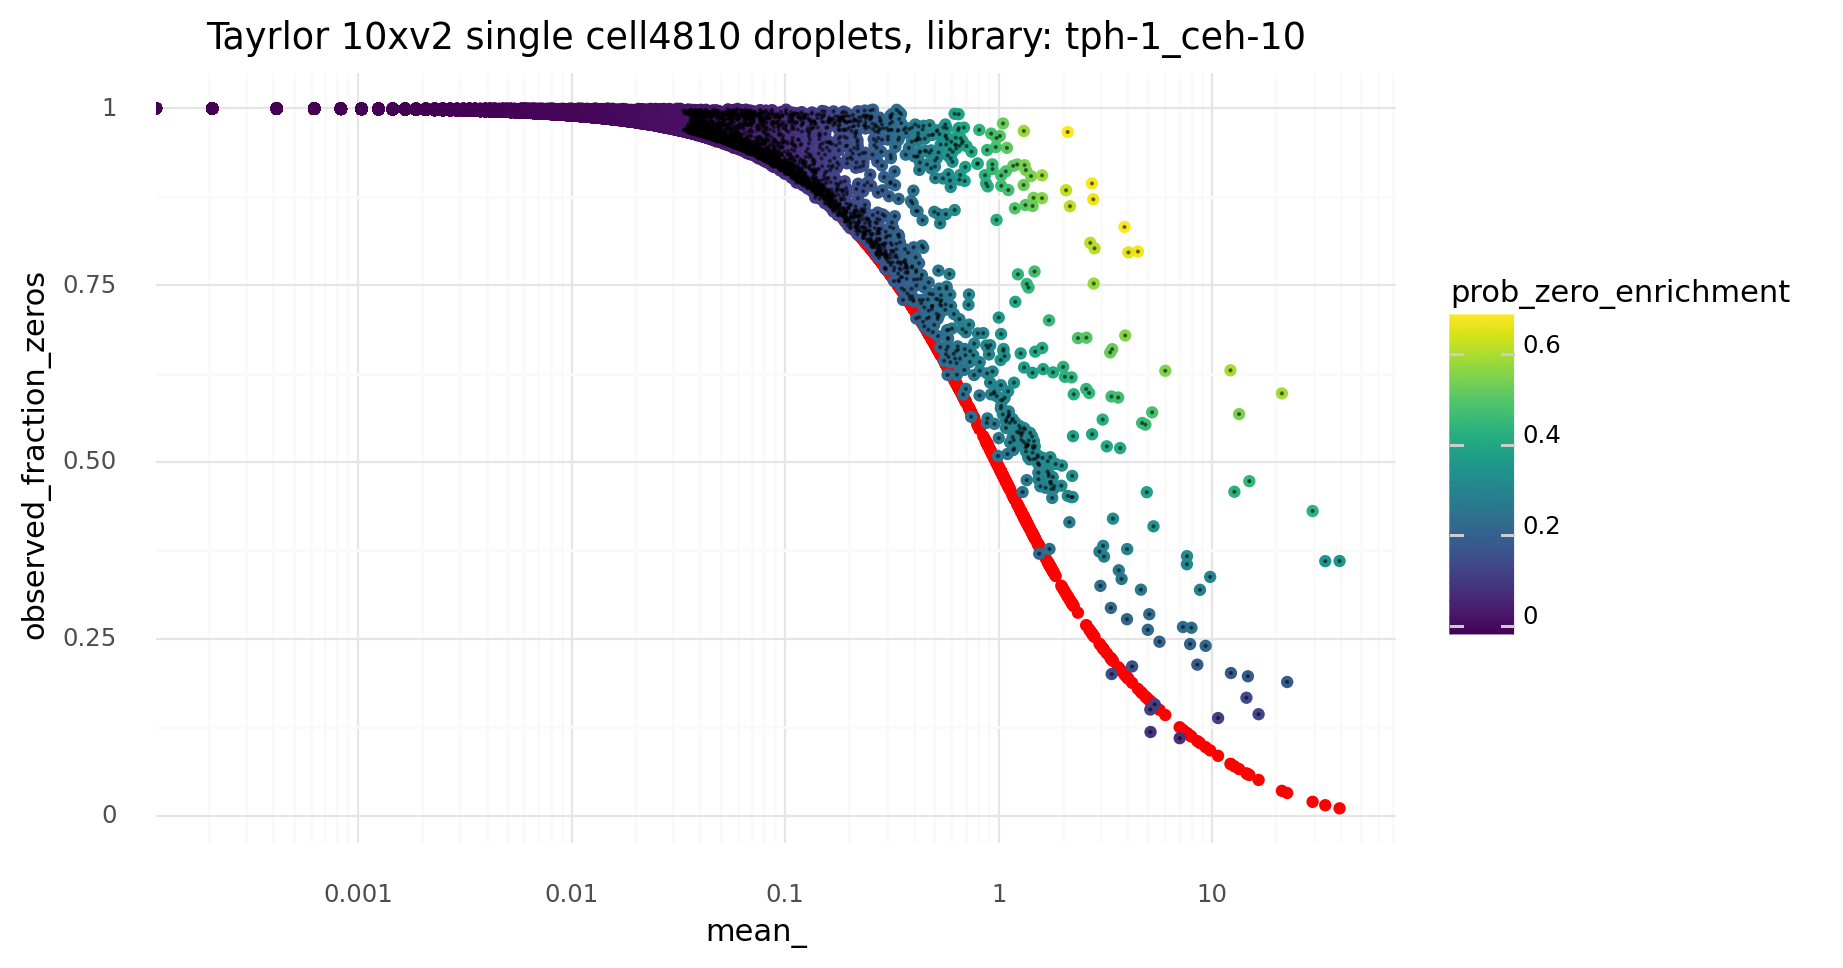

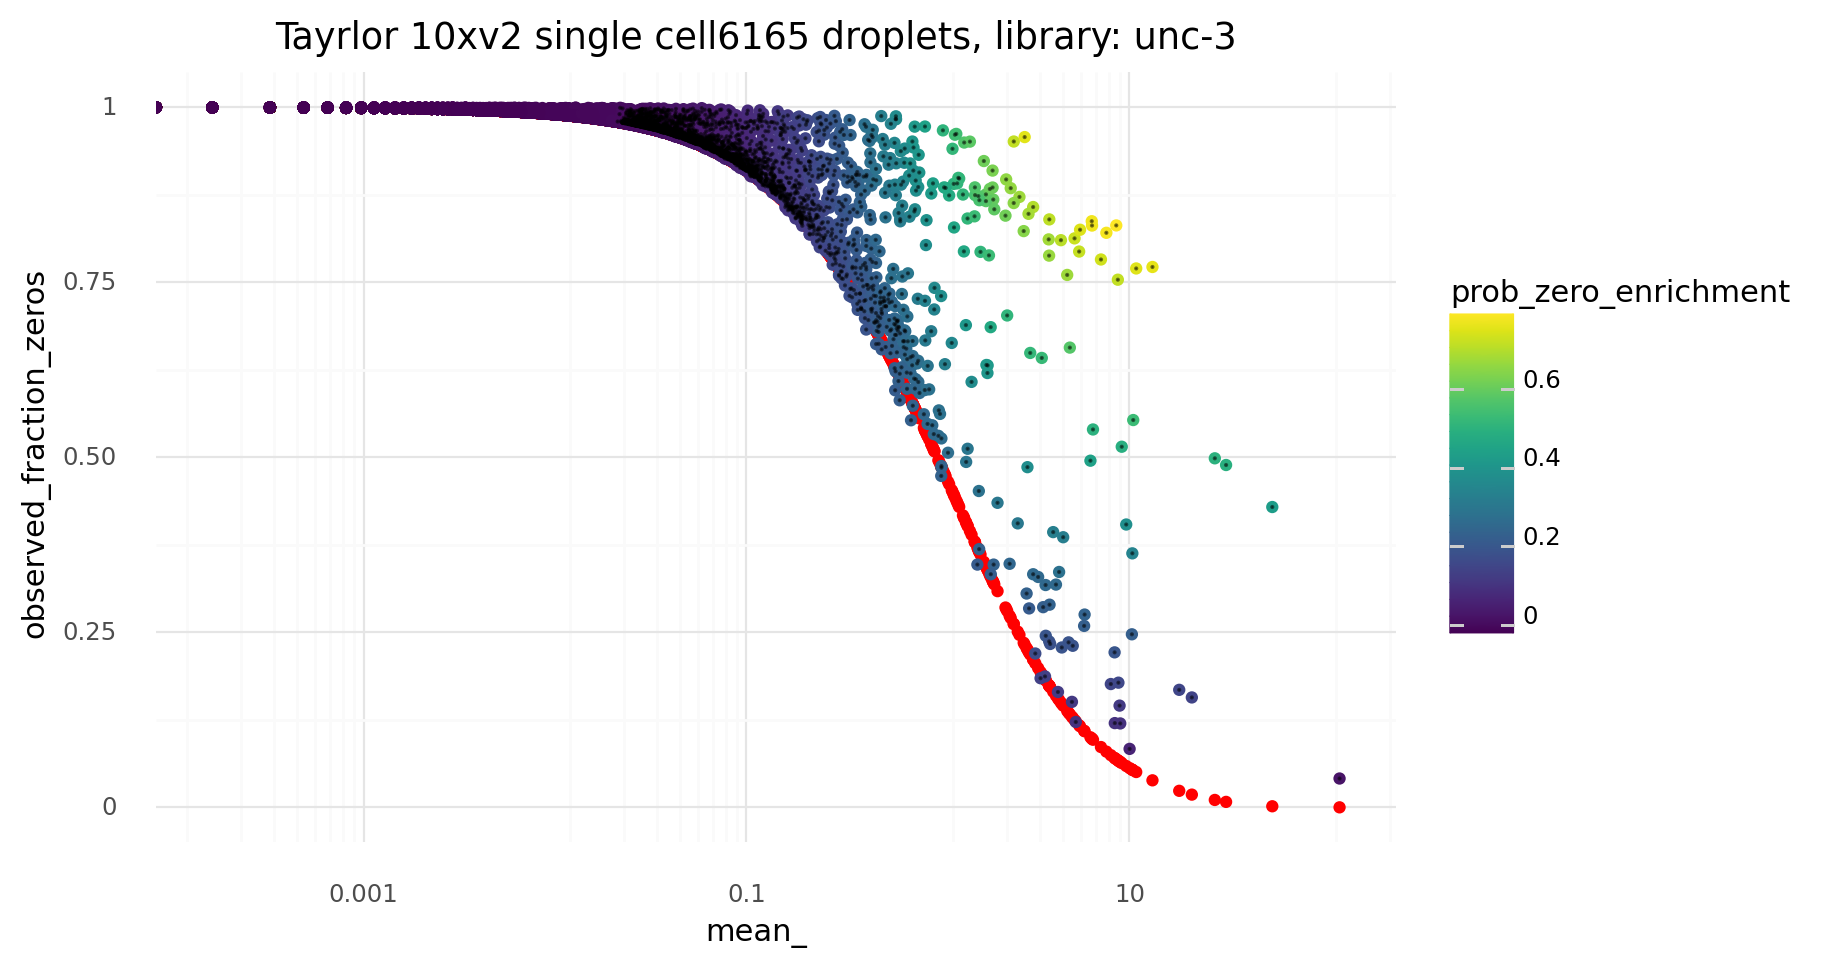

In [5]:
for experiment in adata.obs.experiment.unique():
    
    tech = 'Tayrlor 10xv2 single cell'
    if experiment == 'ceh-34': tech = 'Tayrlor 10xv3 single cell'
    if experiment == 'acr-2': tech = 'Tayrlor 10xv3 single cell'
    ad = adata[adata.obs.experiment==experiment].copy()
    
    title=  tech +str(len(ad)) + ' droplets, library: '+ experiment  
    print(f' ======================== {title} ==============================')

    scvi.data.poisson_gene_selection(ad, n_samples = 20000)

    df = ad.var

    df['mean_'] = np.array(ad.X.mean(0))[0]



    p.options.figure_size = (8, 5)
    pt=(
        p.ggplot(p.aes(x='mean_', y='observed_fraction_zeros', color='prob_zero_enrichment'), df)
        + p.geom_point(p.aes(y='expected_fraction_zeros'), color='r')
        + p.geom_point()
        + p.geom_point(data=df.query('highly_variable'), shape='.', size=0.2, color='k', alpha=0.5)
        + p.scale_x_log10()
        + p.theme_minimal()
        + p.labels.ggtitle(title)
    )
    pt.draw()